# Final Project: Data Cleaning & EDA

Erik Strand <br>
13 April 2021

In [1]:
# Load modules

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import geopandas as gpd
import mapclassify
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
# Read in NYC IH housing data, provided by HPD & aggregated by zip code
nyc_ih = gpd.read_file("../data/final project/CLEAN_DATA/nyc")

nyc_ih["ih_prop"] = nyc_ih["aff_units"] / nyc_ih["aff_units"].sum()
nyc_ih = nyc_ih[["zip", "aff_units", "ih_prop", "geometry"]]

nyc_ih.head()

,zip,aff_units,ih_prop,geometry
0,10001,468.0,0.007883,"POLYGON ((987646.000 210360.000, 987522.000 21..."
1,10001,894.0,0.015059,"POLYGON ((987646.000 210360.000, 987522.000 21..."
2,10002,188.0,0.003167,"POLYGON ((985342.000 197658.000, 985336.000 19..."
3,10002,688.0,0.011589,"POLYGON ((985342.000 197658.000, 985336.000 19..."
4,10003,0.0,0.000000,"POLYGON ((987412.000 202684.000, 987400.000 20..."


In [3]:
# Read in Chicago IH data, provided by Chicago Department of Housing & aggregated by zip code
chicago_ih = gpd.read_file("../data/final project/CLEAN_DATA/chicago")

chicago_ih["aff_units"] = chicago_ih["aff_nts"]
chicago_ih["ih_prop"] = chicago_ih["aff_units"] / chicago_ih["aff_units"].sum()
chicago_ih = chicago_ih[["zip", "aff_units", "ih_prop", "geometry"]]

chicago_ih.head()

,zip,aff_units,ih_prop,geometry
0,60647,172.0,0.039368,"POLYGON ((1162710.570 1913303.050, 1162715.690..."
1,60639,0.0,0.000000,"POLYGON ((1149304.490 1914985.850, 1149278.070..."
2,60707,14.0,0.003204,"POLYGON ((1133505.410 1909960.430, 1133421.760..."
3,60622,77.0,0.017624,"POLYGON ((1165664.482 1902791.860, 1165664.480..."
4,60651,0.0,0.000000,"POLYGON ((1154894.670 1905152.880, 1154849.960..."


In [4]:
# Read in San Francisco IH data, provided by SF Mayor's Office of Housing & Comm. Development & aggregated by zip code
sf_ih = gpd.read_file("../data/final project/CLEAN_DATA/sf")

sf_ih["ih_prop"] = sf_ih["aff_units"] / sf_ih["aff_units"].sum()
sf_ih = sf_ih[["zip", "aff_units", "ih_prop", "geometry"]]

sf_ih.head()

,zip,aff_units,ih_prop,geometry
0,94103,33.0,0.007259,"POLYGON ((-122.42641 37.76467, -122.42653 37.7..."
1,94103,1456.0,0.320282,"POLYGON ((-122.42641 37.76467, -122.42653 37.7..."
2,94109,48.0,0.010559,"POLYGON ((-122.41195 37.78886, -122.41188 37.7..."
3,94109,125.0,0.027497,"POLYGON ((-122.41195 37.78886, -122.41188 37.7..."
4,94115,5.0,0.001100,"POLYGON ((-122.42851 37.77906, -122.42998 37.7..."


In [5]:
# Read in Boston IH data, provided by Boston Department of Neighborhood Development & aggregated by zip code
boston_ih = gpd.read_file("../data/final project/CLEAN_DATA/boston")

boston_ih["ih_prop"] = boston_ih["aff_units"] / boston_ih["aff_units"].sum()
boston_ih = boston_ih[["zip", "aff_units", "ih_prop", "geometry"]]

boston_ih.head()

,zip,aff_units,ih_prop,geometry
0,2134,1111.0,0.027757,"POLYGON ((-71.12340 42.36421, -71.12332 42.363..."
1,2125,2319.0,0.057937,"POLYGON ((-71.04541 42.32381, -71.04472 42.323..."
2,2110,32.0,0.000799,"POLYGON ((-71.05109 42.36418, -71.04960 42.364..."
3,2118,4353.0,0.108754,"POLYGON ((-71.06315 42.34689, -71.06304 42.346..."
4,2126,1045.0,0.026108,"POLYGON ((-71.09670 42.29095, -71.09641 42.290..."


In [6]:
# Read in Washington DC IH data, provided by DC Dept. of Housing & Community Development & aggregated by zip code
dc_ih = gpd.read_file("../data/final project/CLEAN_DATA/dc")

dc_ih["ih_prop"] = dc_ih["aff_units"] / dc_ih["aff_units"].sum()
dc_ih = dc_ih[["zip", "aff_units", "ih_prop", "geometry"]]

dc_ih.head()

,zip,aff_units,ih_prop,geometry
0,20036,33.0,0.001929,"POLYGON ((-77.04881 38.90531, -77.04881 38.905..."
1,20037,77.0,0.004502,"POLYGON ((-77.06927 38.90058, -77.06871 38.901..."
2,20045,0.0,0.000000,"POLYGON ((-77.03196 38.89735, -77.03174 38.897..."
3,20052,0.0,0.000000,"POLYGON ((-77.04727 38.90069, -77.04692 38.900..."
4,20053,0.0,0.000000,"POLYGON ((-77.01348 38.88627, -77.01317 38.886..."


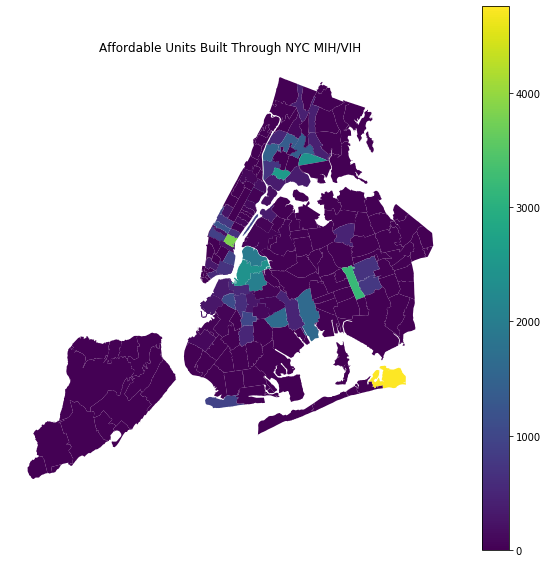

In [7]:
ax = nyc_ih.plot(column='aff_units', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Affordable Units Built Through NYC MIH/VIH")
plt.axis(False)
plt.show()

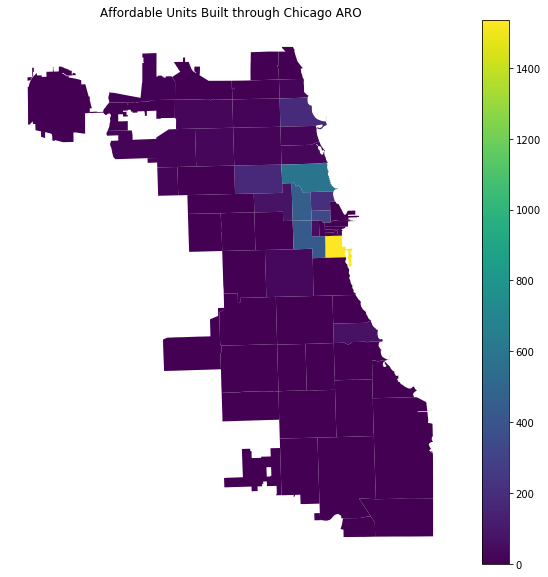

In [8]:
ax = chicago_ih.plot(column='aff_units', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Affordable Units Built through Chicago ARO")
plt.axis(False)
plt.show()

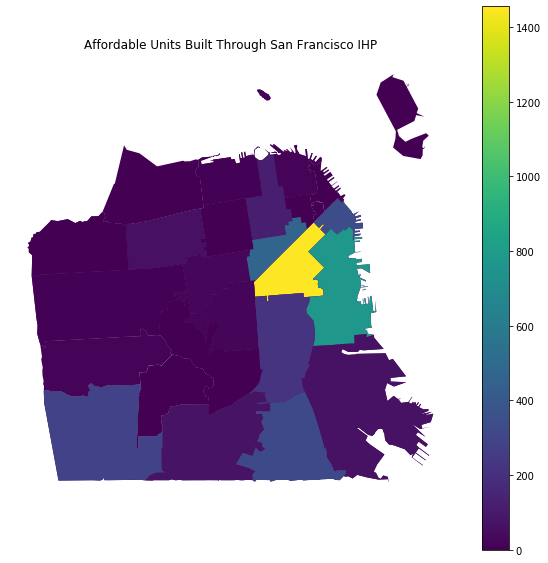

In [9]:
ax = sf_ih.plot(column='aff_units', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Affordable Units Built Through San Francisco IHP")
plt.axis(False)
plt.show()

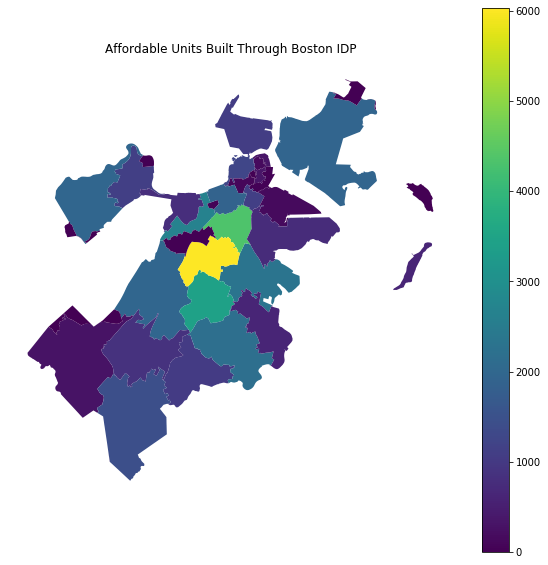

In [10]:
ax = boston_ih.plot(column='aff_units', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Affordable Units Built Through Boston IDP")
plt.axis(False)
plt.show()

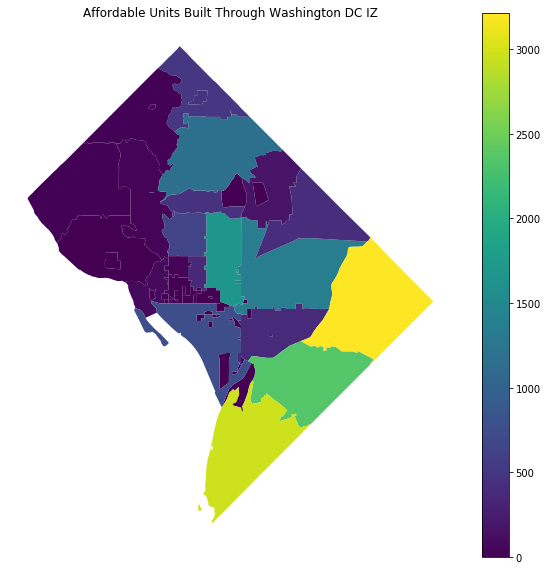

In [11]:
ax = dc_ih.plot(column='aff_units', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Affordable Units Built Through Washington DC IZ")
plt.axis(False)
plt.show()

In [12]:
chi_housing = pd.read_csv("../data/final project/CLEAN_DATA/chi_housing.csv")

chi_housing.head()

,zip,rental_all,rental_2014plus
0,60601,5959,763
1,60602,345,214
2,60603,236,0
3,60604,356,17
4,60605,7636,869


In [13]:
nyc_housing = pd.read_csv("../data/final project/CLEAN_DATA/nyc_housing.csv")

nyc_housing.head()

,zip,rental_all,rental_2014plus
0,10001,9712,1229
1,10002,28933,92
2,10003,17598,98
3,10004,1104,0
4,10005,3444,4


In [14]:
sf_housing = pd.read_csv("../data/final project/CLEAN_DATA/sf_housing.csv")

sf_housing.head()

,zip,rental_all,rental_2014plus
0,94102,16438,565
1,94103,13384,1045
2,94104,190,37
3,94105,3198,676
4,94107,8603,509


In [15]:
boston_housing = pd.read_csv("../data/final project/CLEAN_DATA/boston_housing.csv")

boston_housing.head()

,zip,rental_all,rental_2014plus
0,2021,2136,155
1,2026,2796,32
2,2108,1231,0
3,2109,1269,0
4,2110,544,74


In [16]:
dc_housing = pd.read_csv("../data/final project/CLEAN_DATA/dc_housing.csv")

dc_housing.head()

,zip,rental_all,rental_2014plus
0,20001,12671,1874
1,20002,17778,2141
2,20003,7395,1233
3,20004,754,0
4,20005,5795,68


In [17]:
chi_social = pd.read_csv("../data/final project/CLEAN_DATA/chi_si.csv")

chi_social.head()

,zip,med_hh_inc,pop,med_age,youth_pop,youth_perc,elderly_pop,elderly_perc,white_pop,white_perc,...,pacisl_perc,other_race_pop,other_race_perc,multiracial_pop,multiracial_perc,latinx_pop,latinx_perc,citizen_pop,citizen_perc,housing_total
0,60601,173494,15083,33,880,0.058344,2109,0.139826,11004,0.729563,...,0.0,104,0.006895,423,0.028045,1224,0.081151,10789,0.715309,10748
1,60602,250000,1145,34,149,0.130131,6,0.005240,734,0.641048,...,0.0,0,0.000000,41,0.035808,74,0.064629,883,0.771179,714
2,60603,250000,1052,31,16,0.015209,120,0.114068,661,0.628327,...,0.0,0,0.000000,13,0.012357,34,0.032319,828,0.787072,810
3,60604,195625,823,32,36,0.043742,72,0.087485,532,0.646416,...,0.0,0,0.000000,10,0.012151,28,0.034022,660,0.801944,578
4,60605,169920,29060,33,2411,0.082966,2923,0.100585,18370,0.632140,...,0.0,528,0.018169,1248,0.042946,2185,0.075189,23691,0.815244,16684


In [18]:
nyc_social = pd.read_csv("../data/final project/CLEAN_DATA/nyc_si.csv")

nyc_social.head()

,zip,med_hh_inc,pop,med_age,youth_pop,youth_perc,elderly_pop,elderly_perc,white_pop,white_perc,...,pacisl_perc,other_race_pop,other_race_perc,multiracial_pop,multiracial_perc,latinx_pop,latinx_perc,citizen_pop,citizen_perc,housing_total
0,10001,122776,24117,36,2101,0.087117,3490,0.144711,15677,0.650039,...,0.000871,799,0.033130,717,0.029730,3741,0.155119,18676,0.774392,14746
1,10002,40045,74479,44,9477,0.127244,16931,0.227326,23849,0.320211,...,0.000295,8924,0.119819,3127,0.041985,19554,0.262544,53646,0.720284,35921
2,10003,183787,53977,32,3374,0.062508,7215,0.133668,40681,0.753673,...,0.001352,1155,0.021398,1168,0.021639,4559,0.084462,44096,0.816941,30931
3,10004,205202,3335,37,382,0.114543,201,0.060270,2033,0.609595,...,0.005097,35,0.010495,116,0.034783,108,0.032384,2537,0.760720,2264
4,10005,241094,8701,30,1037,0.119182,93,0.010688,6532,0.750718,...,0.000000,217,0.024940,315,0.036203,552,0.063441,6542,0.751868,5889


In [19]:
sf_social = pd.read_csv("../data/final project/CLEAN_DATA/sf_si.csv")

sf_social.head()

,zip,med_hh_inc,pop,med_age,youth_pop,youth_perc,elderly_pop,elderly_perc,white_pop,white_perc,...,pacisl_perc,other_race_pop,other_race_perc,multiracial_pop,multiracial_perc,latinx_pop,latinx_perc,citizen_pop,citizen_perc,housing_total
0,94102,73470,31392,39,2982,0.094992,4877,0.155358,13637,0.434410,...,0.004364,3237,0.103115,1575,0.050172,6460,0.205785,22535,0.717858,20396
1,94103,92938,30703,36,2733,0.089014,3678,0.119793,12691,0.413347,...,0.005407,3129,0.101912,2053,0.066866,6381,0.207830,23428,0.763052,18147
2,94104,47222,429,49,54,0.125874,107,0.249417,152,0.354312,...,0.000000,48,0.111888,15,0.034965,50,0.116550,286,0.666667,301
3,94105,250000,10916,35,1034,0.094723,739,0.067699,4871,0.446226,...,0.003298,0,0.000000,756,0.069256,739,0.067699,7144,0.654452,6763
4,94107,178972,31461,35,3541,0.112552,3344,0.106290,16006,0.508757,...,0.000985,1739,0.055275,1947,0.061886,3467,0.110200,22941,0.729189,16498


In [20]:
boston_social = pd.read_csv("../data/final project/CLEAN_DATA/boston_si.csv")

boston_social.head()

,zip,med_hh_inc,pop,med_age,youth_pop,youth_perc,elderly_pop,elderly_perc,white_pop,white_perc,...,pacisl_perc,other_race_pop,other_race_perc,multiracial_pop,multiracial_perc,latinx_pop,latinx_perc,citizen_pop,citizen_perc,housing_total
0,2021,136382.0,23369,42.0,5078,0.217296,4372,0.187085,19396,0.829988,...,0.000599,573,0.024520,385,0.016475,954,0.040823,17405,0.744790,9422
1,2026,129352.0,25265,42.0,4840,0.191569,4872,0.192836,21296,0.842905,...,0.000594,525,0.020780,628,0.024857,2209,0.087433,19461,0.770275,10568
2,2108,212500.0,4454,36.0,482,0.108217,718,0.161203,3820,0.857656,...,0.000000,76,0.017063,193,0.043332,220,0.049394,3607,0.809834,2360
3,2109,231964.0,4190,33.0,359,0.085680,642,0.153222,3380,0.806683,...,0.000000,0,0.000000,70,0.016706,146,0.034845,3332,0.795227,2566
4,2110,250000.0,2314,55.0,219,0.094641,675,0.291703,2135,0.922645,...,0.012100,14,0.006050,44,0.019015,38,0.016422,1950,0.842697,1666


In [21]:
dc_social = pd.read_csv("../data/final project/CLEAN_DATA/dc_si.csv")

dc_social.head()

,zip,med_hh_inc,pop,med_age,youth_pop,youth_perc,elderly_pop,elderly_perc,white_pop,white_perc,...,pacisl_perc,other_race_pop,other_race_perc,multiracial_pop,multiracial_perc,latinx_pop,latinx_perc,citizen_pop,citizen_perc,housing_total
0,20001,147101.0,47748,31.0,4148,0.086873,3759,0.078726,22954,0.480732,...,0.000147,1759,0.036839,1399,0.029300,4318,0.090433,40265,0.843281,22532
1,20002,113690.0,67750,33.0,11608,0.171336,5769,0.085151,30195,0.445683,...,0.000148,1459,0.021535,1951,0.028797,4757,0.070214,53505,0.789742,32190
2,20003,192627.0,32675,33.0,4676,0.143106,3314,0.101423,21464,0.656894,...,0.000490,520,0.015914,1273,0.038959,2369,0.072502,26839,0.821393,15039
3,20004,250000.0,1923,41.0,149,0.077483,225,0.117005,1516,0.788352,...,0.000000,11,0.005720,66,0.034321,295,0.153406,1603,0.833593,1615
4,20005,155109.0,12347,34.0,895,0.072487,1123,0.090953,7428,0.601604,...,0.001458,605,0.049000,608,0.049243,1889,0.152993,9467,0.766745,8338


In [22]:
chicago = pd.merge(chicago_ih, chi_housing, on = "zip")
chicago = pd.merge(chicago, chi_social, on = "zip")

chicago["aff_dev_rate"] = chicago["aff_units"] / chicago["pop"]
chicago["tot_dev_rate"] = chicago["rental_2014plus"] / chicago["pop"]
chicago["dev_residual"] = chicago["aff_dev_rate"] - chicago["tot_dev_rate"]
chicago["resid_bin"] = chicago["dev_residual"]>np.mean(chicago["dev_residual"])
chicago["aff_dev_bin"] = chicago["aff_dev_rate"]>np.mean(chicago["aff_dev_rate"])
chicago["aff_unit_bin"] = chicago["aff_units"]>0
chicago["ih_prop_bin"] = chicago["ih_prop"]>np.mean(chicago["ih_prop"])

chicago.head()

,zip,aff_units,ih_prop,geometry,rental_all,rental_2014plus,med_hh_inc,pop,med_age,youth_pop,...,citizen_pop,citizen_perc,housing_total,aff_dev_rate,tot_dev_rate,dev_residual,resid_bin,aff_dev_bin,aff_unit_bin,ih_prop_bin
0,60647,172.0,0.039368,"POLYGON ((1162710.570 1913303.050, 1162715.690...",21919,440,88699,87633,32,15892,...,62546,0.713727,39159,0.001963,0.005021,-0.003058,True,False,True,True
1,60639,0.0,0.000000,"POLYGON ((1149304.490 1914985.850, 1149278.070...",13273,28,51000,88204,34,23036,...,47185,0.534953,28659,0.000000,0.000317,-0.000317,True,False,False,False
2,60707,14.0,0.003204,"POLYGON ((1133505.410 1909960.430, 1133421.760...",5126,124,82969,43093,40,8982,...,29764,0.690692,16680,0.000325,0.002877,-0.002553,True,False,True,False
3,60707,14.0,0.003204,"POLYGON ((1127563.350 1919165.960, 1127500.000...",5126,124,82969,43093,40,8982,...,29764,0.690692,16680,0.000325,0.002877,-0.002553,True,False,True,False
4,60622,77.0,0.017624,"POLYGON ((1165664.482 1902791.860, 1165664.480...",14847,166,129391,53294,32,7684,...,42268,0.793110,26174,0.001445,0.003115,-0.001670,True,False,True,True


In [23]:
nyc = pd.merge(nyc_ih, nyc_housing, on = "zip")
nyc = pd.merge(nyc, nyc_social, on = "zip")

nyc["aff_dev_rate"] = nyc["aff_units"] / nyc["pop"]
nyc["tot_dev_rate"] = nyc["rental_2014plus"] / nyc["pop"]
nyc["dev_residual"] = nyc["aff_dev_rate"] - nyc["tot_dev_rate"]
nyc["resid_bin"] = nyc["dev_residual"]>np.mean(nyc["dev_residual"])
nyc["aff_dev_bin"] = nyc["aff_dev_rate"]>np.mean(nyc["aff_dev_rate"])
nyc["aff_unit_bin"] = nyc["aff_units"]>0
nyc["ih_prop_bin"] = nyc["ih_prop"]>np.mean(nyc["ih_prop"])
ny = nyc[["zip", "aff_units", "aff_dev_rate", "geometry"]].groupby("zip").sum()
ny = pd.merge(ny, nyc.drop(["aff_units", "aff_dev_rate"], axis=1), on = "zip", how = "left")
nyc = ny.drop_duplicates("zip")

nyc.head()

,zip,aff_units,aff_dev_rate,ih_prop,geometry,rental_all,rental_2014plus,med_hh_inc,pop,med_age,...,latinx_perc,citizen_pop,citizen_perc,housing_total,tot_dev_rate,dev_residual,resid_bin,aff_dev_bin,aff_unit_bin,ih_prop_bin
0,10001,1362.0,0.056475,0.007883,"POLYGON ((987646.000 210360.000, 987522.000 21...",9712,1229,122776,24117,36,...,0.155119,18676,0.774392,14746,0.050960,-0.031555,False,True,True,True
2,10002,876.0,0.011762,0.003167,"POLYGON ((985342.000 197658.000, 985336.000 19...",28933,92,40045,74479,44,...,0.262544,53646,0.720284,35921,0.001235,0.001289,False,False,True,False
4,10003,0.0,0.000000,0.000000,"POLYGON ((987412.000 202684.000, 987400.000 20...",17598,98,183787,53977,32,...,0.084462,44096,0.816941,30931,0.001816,-0.001816,False,False,False,False
5,10004,0.0,0.000000,0.000000,"MULTIPOLYGON (((982030.000 197212.000, 981958....",1104,0,205202,3335,37,...,0.032384,2537,0.760720,2264,0.000000,0.000000,False,False,False,False
6,10005,0.0,0.000000,0.000000,"POLYGON ((982126.000 195468.000, 982080.000 19...",3444,4,241094,8701,30,...,0.063441,6542,0.751868,5889,0.000460,-0.000460,False,False,False,False


In [24]:
sf = pd.merge(sf_ih, sf_housing, on = "zip")
sf = pd.merge(sf, sf_social, on = "zip")

sf["aff_dev_rate"] = sf["aff_units"] / sf["pop"]
sf["tot_dev_rate"] = sf["rental_2014plus"] / sf["pop"]
sf["dev_residual"] = sf["aff_dev_rate"] - sf["tot_dev_rate"]
sf["resid_bin"] = sf["dev_residual"]>np.mean(sf["dev_residual"])
sf["aff_dev_bin"] = sf["aff_dev_rate"]>np.mean(sf["aff_dev_rate"])
sf["aff_unit_bin"] = sf["aff_units"]>0
sf["ih_prop_bin"] = sf["ih_prop"]>np.mean(sf["ih_prop"])

sf.head()

,zip,aff_units,ih_prop,geometry,rental_all,rental_2014plus,med_hh_inc,pop,med_age,youth_pop,...,citizen_pop,citizen_perc,housing_total,aff_dev_rate,tot_dev_rate,dev_residual,resid_bin,aff_dev_bin,aff_unit_bin,ih_prop_bin
0,94103,33.0,0.007259,"POLYGON ((-122.42641 37.76467, -122.42653 37.7...",13384,1045,92938,30703,36,2733,...,23428,0.763052,18147,0.001075,0.034036,-0.032961,False,False,True,False
1,94103,1456.0,0.320282,"POLYGON ((-122.42641 37.76467, -122.42653 37.7...",13384,1045,92938,30703,36,2733,...,23428,0.763052,18147,0.047422,0.034036,0.013386,True,True,True,True
2,94109,48.0,0.010559,"POLYGON ((-122.41195 37.78886, -122.41188 37.7...",28274,193,144803,57302,36,3380,...,46414,0.809989,38109,0.000838,0.003368,-0.002530,True,False,True,False
3,94109,125.0,0.027497,"POLYGON ((-122.41195 37.78886, -122.41188 37.7...",28274,193,144803,57302,36,3380,...,46414,0.809989,38109,0.002181,0.003368,-0.001187,True,False,True,True
4,94115,5.0,0.001100,"POLYGON ((-122.42851 37.77906, -122.42998 37.7...",12598,59,156757,34604,37,4236,...,26710,0.771876,19323,0.000144,0.001705,-0.001561,True,False,True,False


In [25]:
boston = pd.merge(boston_ih, boston_housing, on = "zip")
boston = pd.merge(boston, boston_social, on = "zip")

boston["aff_dev_rate"] = boston["aff_units"] / boston["pop"]
boston["tot_dev_rate"] = boston["rental_2014plus"] / boston["pop"]
boston["dev_residual"] = boston["aff_dev_rate"] - boston["tot_dev_rate"]
boston["resid_bin"] = boston["dev_residual"]>np.mean(boston["dev_residual"])
boston["aff_dev_bin"] = boston["aff_dev_rate"]>np.mean(boston["aff_dev_rate"])
boston["aff_unit_bin"] = boston["aff_units"]>0
boston["ih_prop_bin"] = boston["ih_prop"]>np.mean(boston["ih_prop"])

boston.head()

,zip,aff_units,ih_prop,geometry,rental_all,rental_2014plus,med_hh_inc,pop,med_age,youth_pop,...,citizen_pop,citizen_perc,housing_total,aff_dev_rate,tot_dev_rate,dev_residual,resid_bin,aff_dev_bin,aff_unit_bin,ih_prop_bin
0,2134,1111.0,0.027757,"POLYGON ((-71.12340 42.36421, -71.12332 42.363...",7339,251,78286.0,19907,27.0,1255,...,13615,0.683930,9016,0.055810,0.012609,0.043201,True,True,True,True
1,2125,2319.0,0.057937,"POLYGON ((-71.04541 42.32381, -71.04472 42.323...",8430,172,66310.0,34847,32.0,6269,...,23046,0.661348,14336,0.066548,0.004936,0.061612,True,True,True,True
2,2110,32.0,0.000799,"POLYGON ((-71.05109 42.36418, -71.04960 42.364...",544,74,250000.0,2314,55.0,219,...,1950,0.842697,1666,0.013829,0.031979,-0.018150,False,False,True,False
3,2118,4353.0,0.108754,"POLYGON ((-71.06315 42.34689, -71.06304 42.346...",8665,618,93125.0,28262,34.0,4062,...,21692,0.767532,14306,0.154023,0.021867,0.132156,True,True,True,True
4,2126,1045.0,0.026108,"POLYGON ((-71.09670 42.29095, -71.09641 42.290...",5936,0,64025.0,29620,36.0,7146,...,18494,0.624375,10903,0.035280,0.000000,0.035280,True,False,True,True


In [26]:
dc = pd.merge(dc_ih, dc_housing, on = "zip")
dc = pd.merge(dc, dc_social, on = "zip")

dc["aff_dev_rate"] = dc["aff_units"] / dc["pop"]
dc["tot_dev_rate"] = dc["rental_2014plus"] / dc["pop"]
dc["dev_residual"] = dc["aff_dev_rate"] - dc["tot_dev_rate"]
dc["resid_bin"] = dc["dev_residual"]>np.mean(dc["dev_residual"])
dc["aff_dev_rate"] = np.where(np.isinf(dc["aff_dev_rate"]), 0, dc["aff_dev_rate"]) # remove infinite values
dc["aff_dev_rate"] = np.where(dc["aff_dev_rate"] > 1, 0, dc["aff_dev_rate"])
dc["aff_dev_bin"] = dc["aff_dev_rate"]>np.mean(dc["aff_dev_rate"])
dc["aff_unit_bin"] = dc["aff_units"]>0
dc["ih_prop_bin"] = dc["ih_prop"]>np.mean(dc["ih_prop"])

dc.head()

,zip,aff_units,ih_prop,geometry,rental_all,rental_2014plus,med_hh_inc,pop,med_age,youth_pop,...,citizen_pop,citizen_perc,housing_total,aff_dev_rate,tot_dev_rate,dev_residual,resid_bin,aff_dev_bin,aff_unit_bin,ih_prop_bin
0,20036,33.0,0.001929,"POLYGON ((-77.04881 38.90531, -77.04881 38.905...",2578,110,161667.0,5455,33.0,116,...,4776,0.875527,4324,0.006049,0.020165,-0.014115,False,False,True,False
1,20037,77.0,0.004502,"POLYGON ((-77.06927 38.90058, -77.06871 38.901...",3775,63,204435.0,15179,26.0,320,...,12481,0.822254,7806,0.005073,0.004150,0.000922,False,False,True,False
2,20045,0.0,0.000000,"POLYGON ((-77.03196 38.89735, -77.03174 38.897...",0,0,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,NaN,False,False,False,False
3,20052,0.0,0.000000,"POLYGON ((-77.04727 38.90069, -77.04692 38.900...",0,0,NaN,126,20.0,0,...,88,0.698413,0,0.000000,0.000000,0.000000,False,False,False,False
4,20053,0.0,0.000000,"POLYGON ((-77.01348 38.88627, -77.01317 38.886...",0,0,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,NaN,False,False,False,False


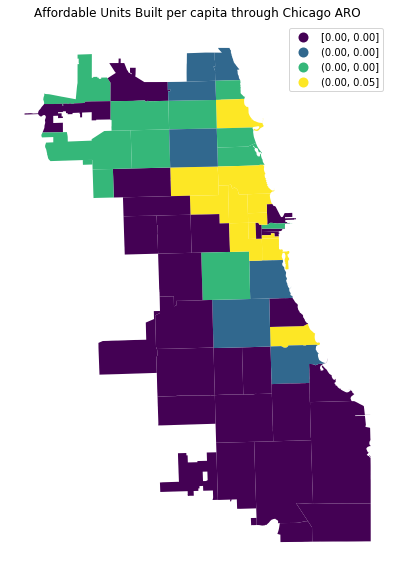

In [27]:
ax = chicago.plot(column='aff_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Affordable Units Built per capita through Chicago ARO")
plt.axis(False)
plt.show()

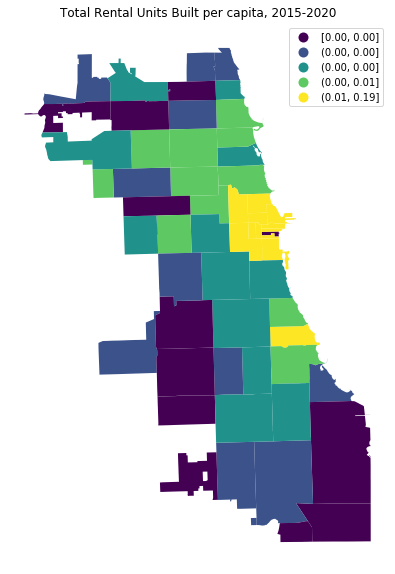

In [28]:
ax = chicago.plot(column='tot_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Total Rental Units Built per capita, 2015-2020")
plt.axis(False)
plt.show()

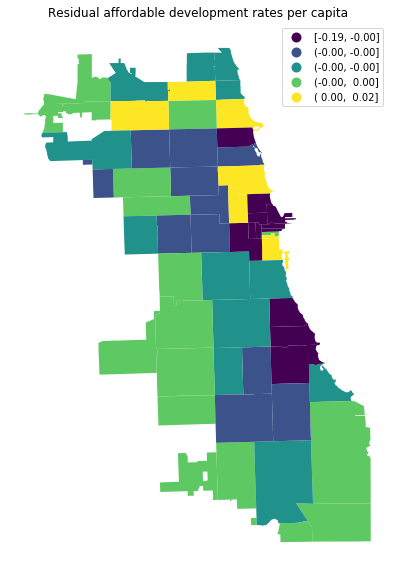

In [29]:
chicago["dev_residual"] = chicago["aff_dev_rate"] - chicago["tot_dev_rate"]

ax = chicago.plot(column='dev_residual', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Residual affordable development rates per capita")
plt.axis(False)
plt.show()

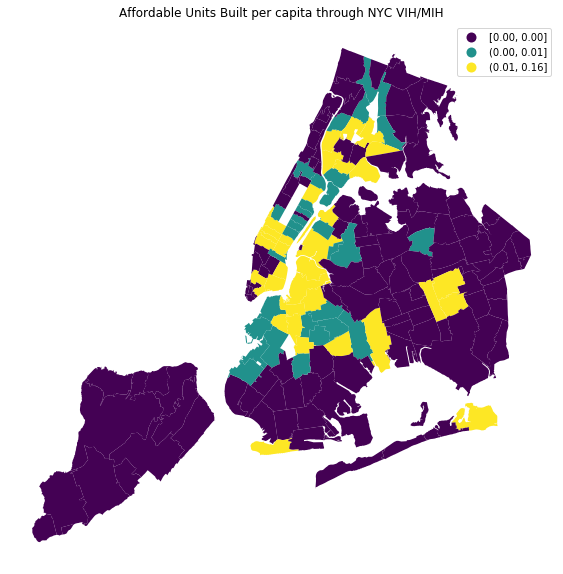

In [30]:
ax = nyc.plot(column='aff_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Affordable Units Built per capita through NYC VIH/MIH")
plt.axis(False)
plt.show()

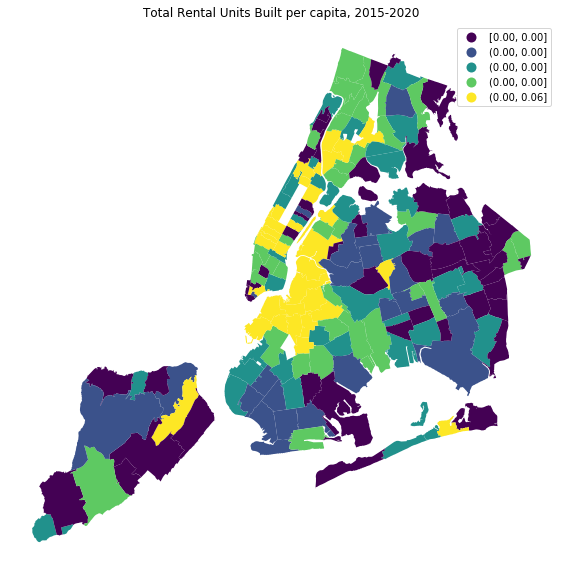

In [31]:
ax = nyc.plot(column='tot_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Total Rental Units Built per capita, 2015-2020")
plt.axis(False)
plt.show()

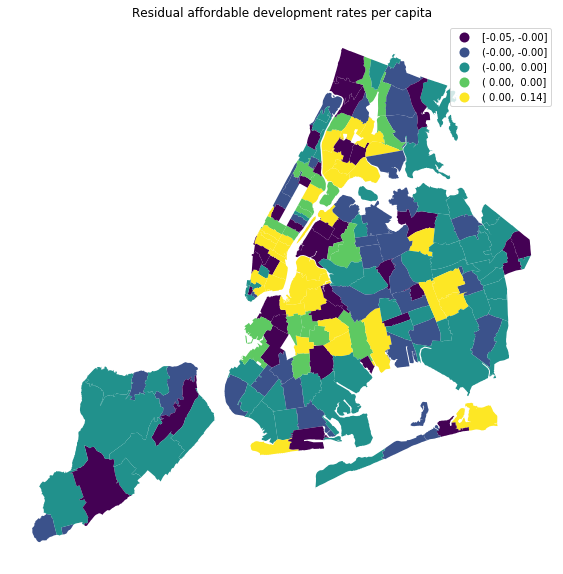

In [32]:
nyc["dev_residual"] = nyc["aff_dev_rate"] - nyc["tot_dev_rate"]

ax = nyc.plot(column='dev_residual', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Residual affordable development rates per capita")
plt.axis(False)
plt.show()

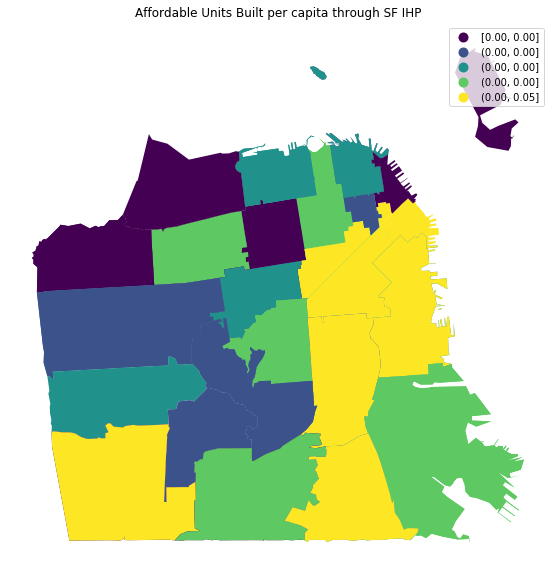

In [33]:
ax = sf.plot(column='aff_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Affordable Units Built per capita through SF IHP")
plt.axis(False)
plt.show()

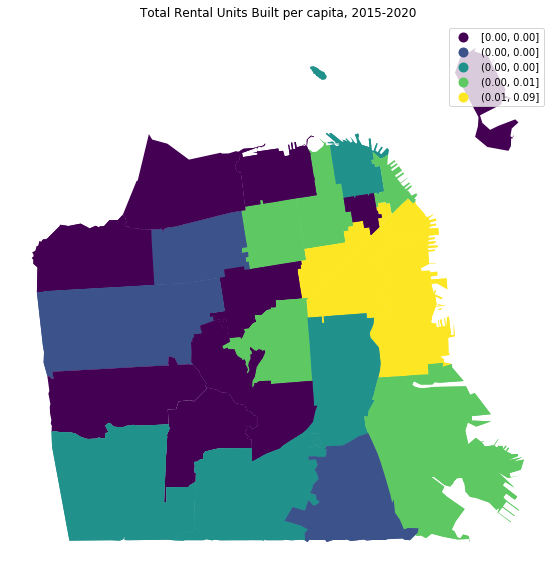

In [34]:
ax = sf.plot(column='tot_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Total Rental Units Built per capita, 2015-2020")
plt.axis(False)
plt.show()

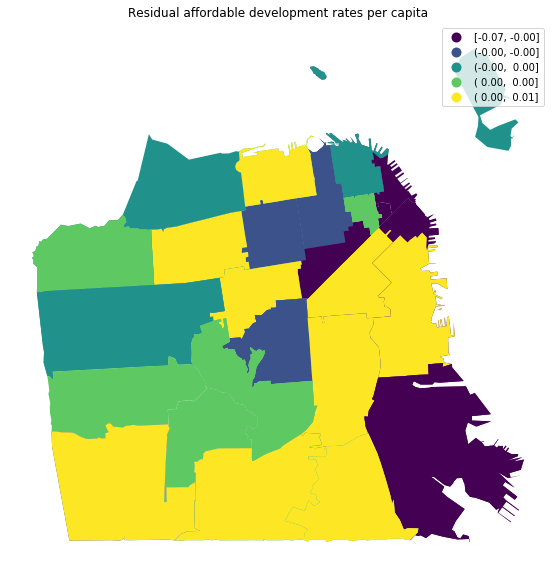

In [35]:
sf["dev_residual"] = sf["aff_dev_rate"] - sf["tot_dev_rate"]

ax = sf.plot(column='dev_residual', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Residual affordable development rates per capita")
plt.axis(False)
plt.show()

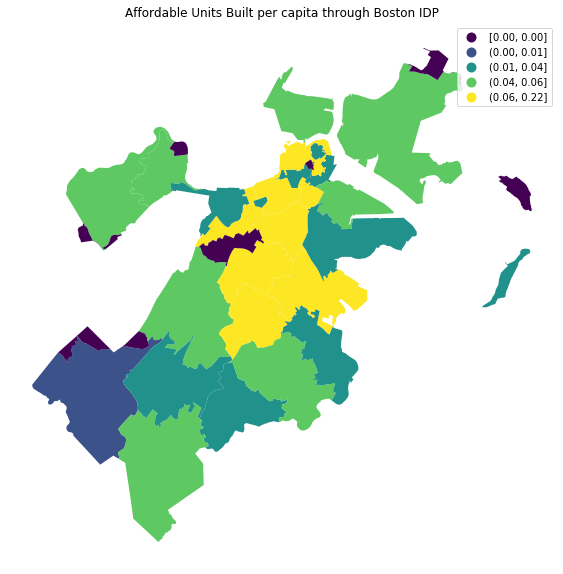

In [36]:
ax = boston.plot(column='aff_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Affordable Units Built per capita through Boston IDP")
plt.axis(False)
plt.show()

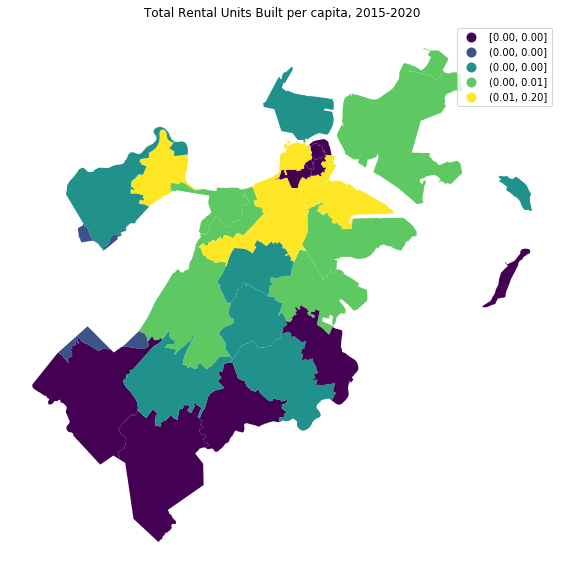

In [37]:
ax = boston.plot(column='tot_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Total Rental Units Built per capita, 2015-2020")
plt.axis(False)
plt.show()

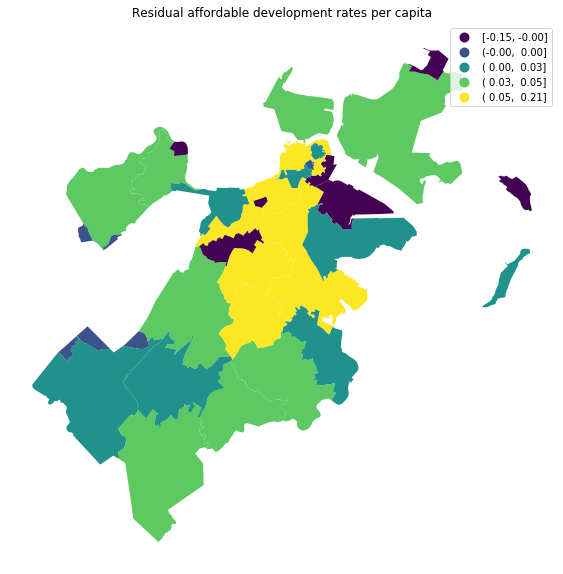

In [38]:
boston["dev_residual"] = boston["aff_dev_rate"] - boston["tot_dev_rate"]

ax = boston.plot(column='dev_residual', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Residual affordable development rates per capita")
plt.axis(False)
plt.show()

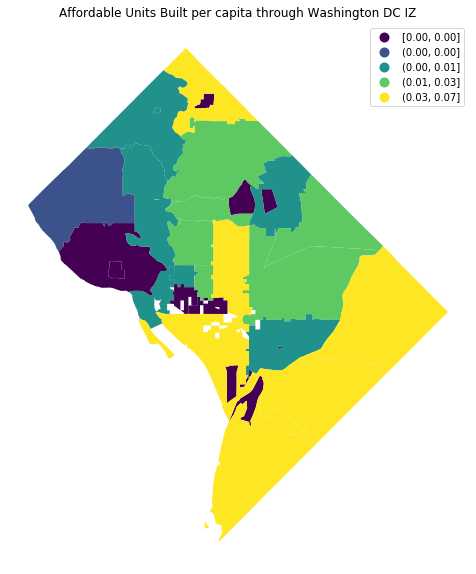

In [39]:
ax = dc.plot(column='aff_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Affordable Units Built per capita through Washington DC IZ")
plt.axis(False)
plt.show()

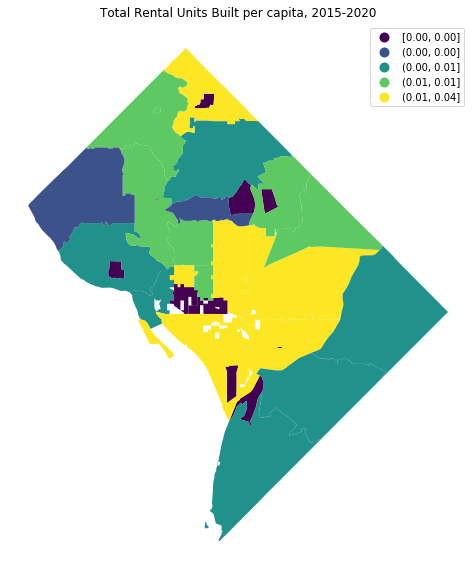

In [40]:
ax = dc.plot(column='tot_dev_rate', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Total Rental Units Built per capita, 2015-2020")
plt.axis(False)
plt.show()

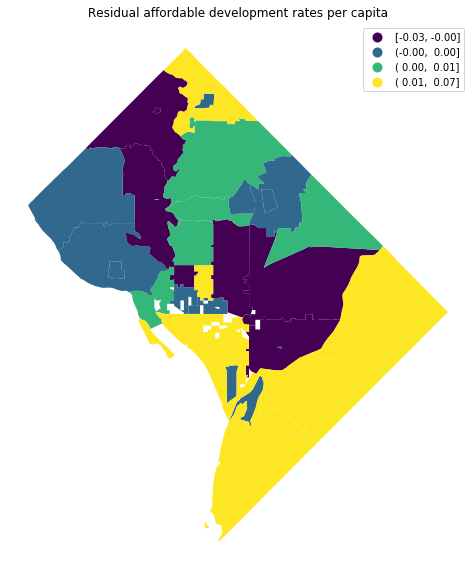

In [41]:
dc["dev_residual"] = dc["aff_dev_rate"] - dc["tot_dev_rate"]

ax = dc.plot(column='dev_residual', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = 'quantiles')
plt.title("Residual affordable development rates per capita")
plt.axis(False)
plt.show()

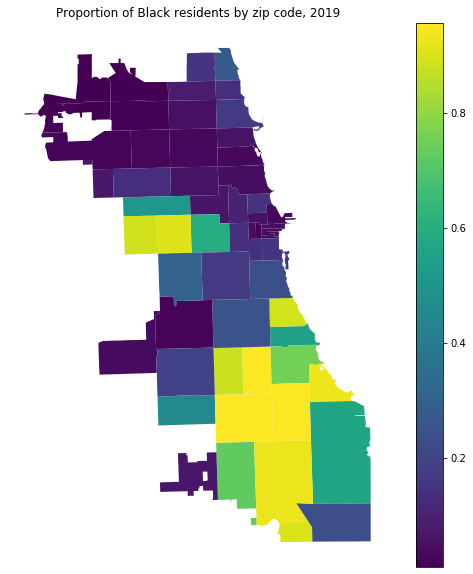

In [42]:
ax = chicago.plot(column='black_perc', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Proportion of Black residents by zip code, 2019")
plt.axis(False)
plt.show()

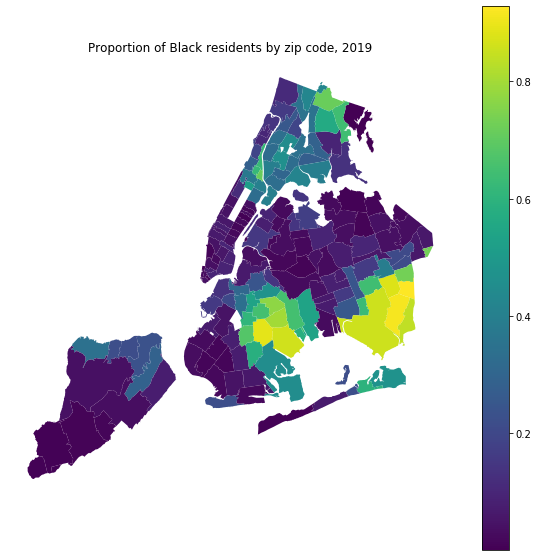

In [43]:
ax = nyc.plot(column='black_perc', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Proportion of Black residents by zip code, 2019")
plt.axis(False)
plt.show()

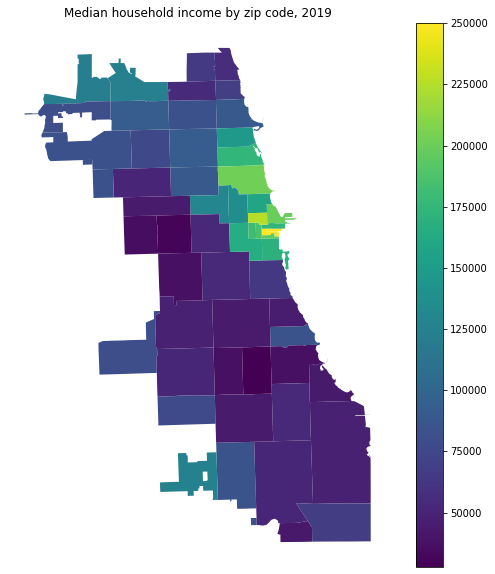

In [44]:
ax = chicago.plot(column='med_hh_inc', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Median household income by zip code, 2019")
plt.axis(False)
plt.show()

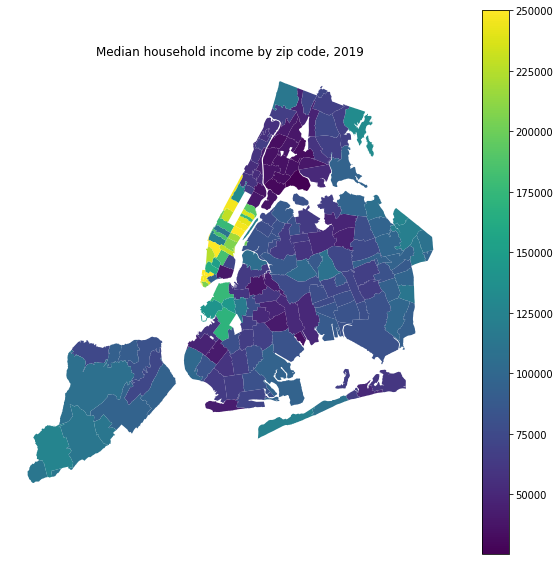

In [45]:
ax = nyc.plot(column='med_hh_inc', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
plt.title("Median household income by zip code, 2019")
plt.axis(False)
plt.show()

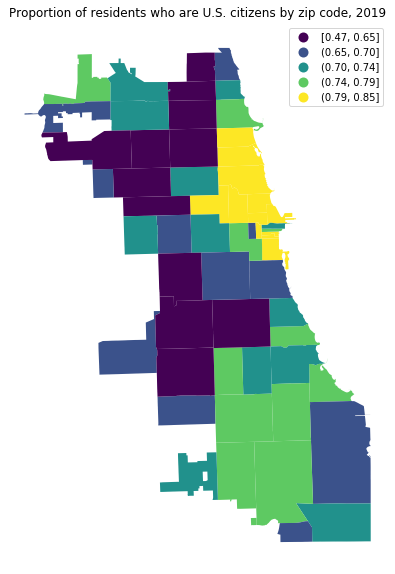

In [46]:
ax = chicago.plot(column='citizen_perc', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = "quantiles")
plt.title("Proportion of residents who are U.S. citizens by zip code, 2019")
plt.axis(False)
plt.show()

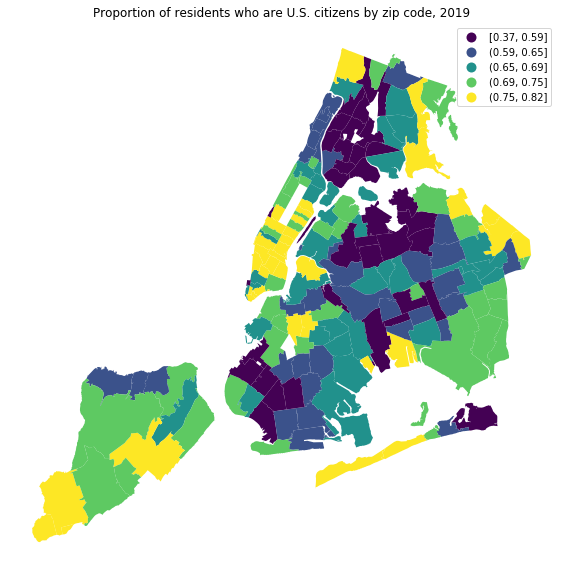

In [47]:
ax = nyc.plot(column='citizen_perc', legend=True, categorical=False, cmap='viridis',figsize=(10,10), scheme = "quantiles")
plt.title("Proportion of residents who are U.S. citizens by zip code, 2019")
plt.axis(False)
plt.show()

In [48]:
nyc["city"] = "nyc"
chicago["city"] = "chicago"
sf["city"] = "sf"
boston["city"] = "boston"
dc["city"] = "dc"

ih = nyc.append(chicago)
ih = ih.append(sf)
ih = ih.append(boston)
ih = ih.append(dc)

ih = ih.drop("geometry", axis = 1)

ih["n"] = ih["white_pop"] + ih["black_pop"] + ih["asian_pop"] + ih["pacisl_pop"] + ih["other_race_pop"] + ih["multiracial_pop"] + ih["latinx_pop"]
ih["n2"] = ih["n"] - 7
ih["simpson1"] = (ih["n"] * (ih["n"] - 1))
ih["simpson2"] = (ih["white_pop"] * (ih["white_pop"] - 1)) + (ih["black_pop"] * (ih["black_pop"] - 1)) + (ih["asian_pop"] * (ih["asian_pop"] - 1)) + (ih["pacisl_pop"] * (ih["pacisl_pop"] - 1)) + (ih["other_race_pop"] * (ih["other_race_pop"] - 1)) + (ih["multiracial_pop"] * (ih["multiracial_pop"] - 1)) + (ih["latinx_pop"] * (ih["latinx_pop"] - 1))
ih["simpson_temp"] = 1 - (ih["simpson2"] / ih["simpson1"])

ih = ih.drop(columns = ["n", "n2", "simpson1", "simpson2"], axis = 1)

test = ih["simpson_temp"]

ih.insert(27, "simpson", test)

ih.iloc[:,0:-2] = ih.iloc[:,0:-2].fillna(0).astype(np.float32)
ih.replace([np.inf, -np.inf], np.nan, inplace=True)

ih = ih.drop(columns = ["youth_perc", "elderly_perc", "white_perc", "black_perc", "asian_perc", "pacisl_perc", "other_race_perc", "multiracial_perc", "latinx_perc", "simpson_temp", "citizen_perc"])

ih.head()

,zip,aff_units,aff_dev_rate,ih_prop,rental_all,rental_2014plus,med_hh_inc,pop,med_age,youth_pop,...,simpson,citizen_pop,housing_total,tot_dev_rate,dev_residual,resid_bin,aff_dev_bin,aff_unit_bin,ih_prop_bin,city
0,10001.0,1362.0,0.056475,0.007883,9712.0,1229.0,122776.0,24117.0,36.0,2101.0,...,0.623194,18676.0,14746.0,0.050960,0.005515,0.0,1.0,1.0,1.0,nyc
2,10002.0,876.0,0.011762,0.003167,28933.0,92.0,40045.0,74479.0,44.0,9477.0,...,0.763648,53646.0,35921.0,0.001235,0.010526,0.0,0.0,1.0,0.0,nyc
4,10003.0,0.0,0.000000,0.000000,17598.0,98.0,183787.0,53977.0,32.0,3374.0,...,0.488300,44096.0,30931.0,0.001816,-0.001816,0.0,0.0,0.0,0.0,nyc
5,10004.0,0.0,0.000000,0.000000,1104.0,0.0,205202.0,3335.0,37.0,382.0,...,0.564544,2537.0,2264.0,0.000000,0.000000,0.0,0.0,0.0,0.0,nyc
6,10005.0,0.0,0.000000,0.000000,3444.0,4.0,241094.0,8701.0,30.0,1037.0,...,0.468530,6542.0,5889.0,0.000460,-0.000460,0.0,0.0,0.0,0.0,nyc


In [49]:
dc = ih[ih["city"] == "dc"]
chicago = ih[ih["city"] == "chicago"]
nyc = ih[ih["city"] == "nyc"]
sf = ih[ih["city"] == "sf"]
boston = ih[ih["city"] == "boston"]

In [50]:
nyc.to_csv("../data/final project/CLEAN_DATA/joined_data/nyc.csv")
chicago.to_csv("../data/final project/CLEAN_DATA/joined_data/chicago.csv")
sf.to_csv("../data/final project/CLEAN_DATA/joined_data/sf.csv")
dc.to_csv("../data/final project/CLEAN_DATA/joined_data/dc.csv")
boston.to_csv("../data/final project/CLEAN_DATA/joined_data/boston.csv")
ih.to_csv("../data/final project/CLEAN_DATA/joined_data/ih_all.csv")

In [51]:
ih.head()

,zip,aff_units,aff_dev_rate,ih_prop,rental_all,rental_2014plus,med_hh_inc,pop,med_age,youth_pop,...,simpson,citizen_pop,housing_total,tot_dev_rate,dev_residual,resid_bin,aff_dev_bin,aff_unit_bin,ih_prop_bin,city
0,10001.0,1362.0,0.056475,0.007883,9712.0,1229.0,122776.0,24117.0,36.0,2101.0,...,0.623194,18676.0,14746.0,0.050960,0.005515,0.0,1.0,1.0,1.0,nyc
2,10002.0,876.0,0.011762,0.003167,28933.0,92.0,40045.0,74479.0,44.0,9477.0,...,0.763648,53646.0,35921.0,0.001235,0.010526,0.0,0.0,1.0,0.0,nyc
4,10003.0,0.0,0.000000,0.000000,17598.0,98.0,183787.0,53977.0,32.0,3374.0,...,0.488300,44096.0,30931.0,0.001816,-0.001816,0.0,0.0,0.0,0.0,nyc
5,10004.0,0.0,0.000000,0.000000,1104.0,0.0,205202.0,3335.0,37.0,382.0,...,0.564544,2537.0,2264.0,0.000000,0.000000,0.0,0.0,0.0,0.0,nyc
6,10005.0,0.0,0.000000,0.000000,3444.0,4.0,241094.0,8701.0,30.0,1037.0,...,0.468530,6542.0,5889.0,0.000460,-0.000460,0.0,0.0,0.0,0.0,nyc


In [55]:
ih.columns

Index(['zip', 'aff_units', 'aff_dev_rate', 'ih_prop', 'rental_all',
       'rental_2014plus', 'med_hh_inc', 'pop', 'med_age', 'youth_pop',
       'elderly_pop', 'white_pop', 'black_pop', 'asian_pop', 'pacisl_pop',
       'other_race_pop', 'multiracial_pop', 'latinx_pop', 'simpson',
       'citizen_pop', 'housing_total', 'tot_dev_rate', 'dev_residual',
       'resid_bin', 'aff_dev_bin', 'aff_unit_bin', 'ih_prop_bin', 'city'],
      dtype='object')